In [1]:
%matplotlib inline


import numpy as np
from mesa import Agent, Model
from mesa.time import RandomActivation

In [2]:
class MktParticipant(Agent):
    def __init__(self, key, model):
        super().__init__(key, model)
        # agent start with a random amt of $, and a random level of 'business savvy'
        self.id = key
        self.usd = np.random.randint(1,50)
        self.savvy = np.random.randint(1, 10)
        self.intelligence = np.random.randint(0,5)
        self.workEthic = np.random.randint(0,5)
    def step(self):
        """ Defines what each agent executes per unit of time; inherited"""        
        # if agent had successful business venture (randomly occurs), gain some usd  and business savvy
        if self.usd > 0:
            #10% of the time, agent has a business success ...savvy ++ and usd++
            is_business_success = np.random.uniform(0, 1) >= .9
            if is_business_success:
                self.usd += 1.
                self.savvy += 1.5
            #70% of the time, agent decides to transact with another person 
            do_transact = np.random.uniform(0, 1) > .3
            if do_transact:
                other = np.random.choice(self.model.schedule.agents)
                #below while-statemtn ensures that once an agent reaches $0, they can no longer 
                #participate in the economy
                #inneficcient, but functional
                while other.usd < 1:
                    other = np.random.choice(self.model.schedule.agents)
                selfCompetence = self.savvy + self.intelligence + self.workEthic
                otherCompetence = other.savvy + other.intelligence + other.workEthic
                if selfCompetence < otherCompetence:
                    self.usd -= 2.
                    other.usd += 2.
                else:
                    other.usd -= 2.
                    self.usd += 2.
            # lottery function: agents hae 10% chance of deciding to play the lottery, and 1/10,000 chance of winning a million dollars if they play
            decide_to_play_lottery = np.random.uniform(0,1)
            if decide_to_play_lottery < .01:
                lottery = np.random.randint(1, 10000)
                if lottery == 6:
                    self.usd+= 10000
                else:
                    self.usd-= 1
                
                
            decide_to_rob_bank = np.random.randint(1,100000)
            if decide_to_rob_bank == 11:
                decide_success = np.random.uniform(0,1)
                if decide_success < .1 :
                    self.usd+=100
                else:
                    
                    self.usd = 0 #go directly to jail

In [3]:
class Economy(Model):
    def __init__(self, n):
        self.num_agents = n
        self.schedule = RandomActivation(self)
        
        # create our `n` agents and add to our model
        for i in range(self.num_agents):
            agent = MktParticipant(i, self)
            self.schedule.add(agent)

    def step(self):
        """Akin to one unit of time; inherited from super-class."""
        self.schedule.step()

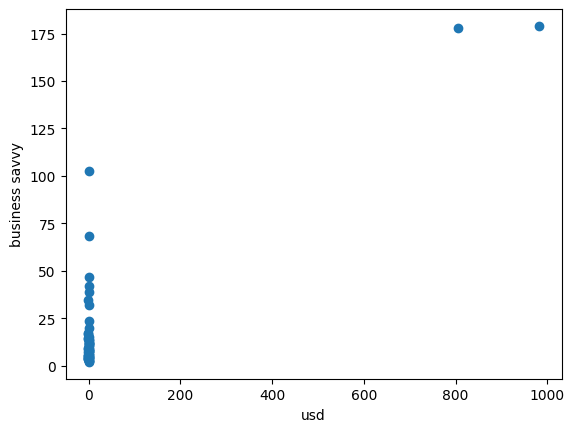

In [4]:
import matplotlib.pyplot as plt


# run the model with many agents
model = Economy(n=50)
for i in range(1000):
    model.step()

# read-out agent data from the model
data = np.asarray(list(map(lambda x: (x.usd, x.savvy), model.schedule.agents)))

# plot the XP (x axis) and strength (y axis)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("usd")
plt.ylabel("business savvy")
plt.show()